## Jan 2021 - Jun 2021

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from pandas import merge
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report


%matplotlib inline

In [2]:
#datasets file path
death_malaysia_path = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv'
cases_malaysia_path = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'

In [3]:
#date range to study
beginningDate = '2021-01-01'
endingDate = '2021-06-30'

In [4]:
#filter the dataset to get the range of dates wanted
death_malaysia = pd.read_csv(death_malaysia_path)
cases_malaysia = pd.read_csv(cases_malaysia_path)

death_malaysia = death_malaysia[death_malaysia['date'] >= beginningDate]
death_malaysia = death_malaysia[death_malaysia['date'] <= endingDate]

cases_malaysia = cases_malaysia[cases_malaysia['date'] >= beginningDate]
cases_malaysia = cases_malaysia[cases_malaysia['date'] <= endingDate]


In [5]:
#filter wanted features (column) 
vaxStatus = pd.DataFrame(cases_malaysia, columns= ['date', 'cases_unvax', 'cases_pvax', 'cases_fvax'])
casesNum = pd.DataFrame(cases_malaysia, columns= ['date', 'cases_new', 'cases_active'])
death = pd.DataFrame(death_malaysia, columns= ['date', 'deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost', 'deaths_new'])
death = death.groupby('date').sum()

#merge wanted features 
features = casesNum.merge(vaxStatus, on='date', how=  'left')
features= features.merge(death, on='date', how='left')
features = features.fillna(0)


#display features 
print(features)

# deletes the date column for training purpose
del features['date'] 



           date  cases_new  cases_active  cases_unvax  cases_pvax  cases_fvax  \
0    2021-01-01       2068         23434         2068           0           0   
1    2021-01-02       2295         22399         2295           0           0   
2    2021-01-03       1704         21366         1704           0           0   
3    2021-01-04       1741         22090         1741           0           0   
4    2021-01-05       2027         22885         2027           0           0   
..          ...        ...           ...          ...         ...         ...   
176  2021-06-26       5803         60647         5294         394         115   
177  2021-06-27       5586         61396         5032         422         132   
178  2021-06-28       5218         61813         4766         341         111   
179  2021-06-29       6437         62845         5849         426         162   
180  2021-06-30       6276         64130         5602         504         170   

     deaths_unvax  deaths_p

In [6]:
#Copy data from features into X
x = features.copy()

#Copy deaths_new from features into Y
y = features['deaths_new']

#Deletes the death_new column from X 
del x['deaths_new'] 

#Test
#print(x)
#print(y)

# Define training, testing and validation data set

In [7]:
# Define training, testing and validation data set

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# Linear Regression

[ 4.23573483 74.16125509  8.97648657 16.00854927 21.71271132 73.74492379
 63.29603656  3.59909651  4.15120455 93.80501918  4.92399842 16.44613138
  9.13644472  9.98798927  5.9979162  75.39213156 30.51143167  9.35155746
  5.67748965 84.64173328  7.15312463  3.72751684 28.32097991 14.03602896
 71.79560364 67.19677912 14.63923754 10.20001703 85.86790042  8.71994324
  7.73653355  7.63206004 26.38136651  5.97787968 13.58248872 15.95268014
 73.0194035  81.73487521 34.25947325 69.22423184  3.26861109  5.72953634
 22.52384676 13.9278308  61.29985576 68.42044857 13.5138937  79.72892353
 71.53793723  4.406769    7.07275075  3.13475514 16.24988688 10.9881264
  3.0748742 ]


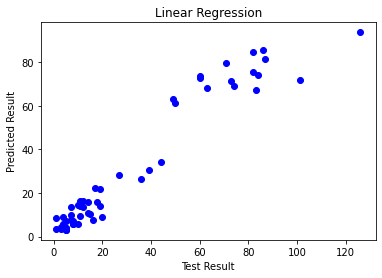

Mean Squared Error
Train:  53.00029891074053
Test:  72.04017640415529


In [9]:
#Linear Regression

#Create an instance of the class
LR = LinearRegression()

#Fit the instance on the data 
LR.fit(x_train,y_train)

#Predict the expected value
y_predict = LR.predict(x_test)
print(y_predict)

#Use Linear Regression to visualise
y_train_pred = LR.predict(x_train)
y_train_mse = mean_squared_error(y_train, y_train_pred)
y_test_pred = LR.predict(x_test)
y_test_mse = mean_squared_error(y_test, y_test_pred)

#Plotting graph
plt.scatter(y_test, y_predict, color='blue')
plt.title('Linear Regression')
plt.xlabel('Test Result')
plt.ylabel('Predicted Result')
plt.show()

print("Mean Squared Error")
print("Train: ", y_train_mse)
print("Test: ", y_test_mse)

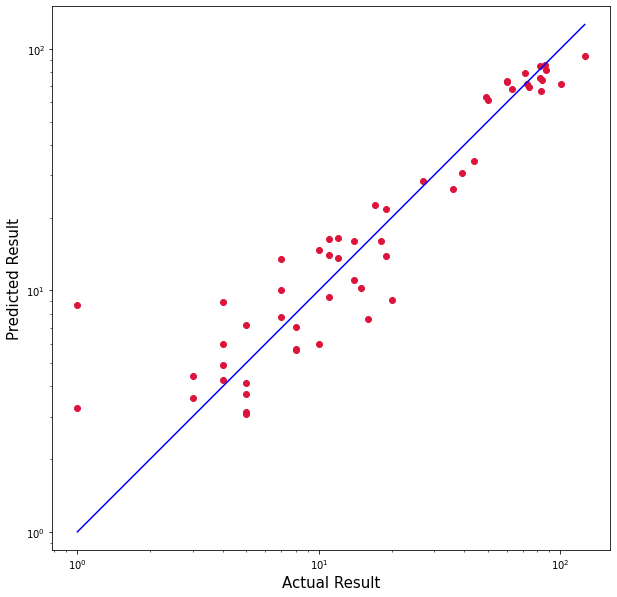

In [10]:
#final result for linear regression
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Result', fontsize=15)
plt.ylabel('Predicted Result', fontsize=15)
plt.axis('equal')
plt.show()

# Lasso Regression

c:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+03, tolerance: 9.463e+00
  model = cd_fast.enet_coordinate_descent(


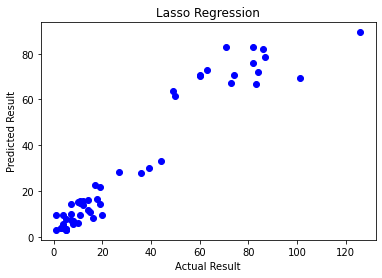

Mean Squared Error
Train:  55.10159159672055
Test:  82.96271330122268


In [11]:
#Lasso Regression

#Create an instance of the class with alpha of 3

LS = Lasso(alpha=3.0)

#Fit the train data

LS.fit(x_train, y_train)

# Use Lasso to visualise 
y_train_pred = LS.predict(x_train)
y_train_mse = mean_squared_error(y_train, y_train_pred)
y_test_pred = LS.predict(x_test)
y_test_mse = mean_squared_error(y_test, y_test_pred)

# Plotting graph
plt.scatter(y_test, y_test_pred, color='blue')
plt.title('Lasso Regression')
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.show()

print("Mean Squared Error")
print("Train: ", y_train_mse)
print("Test: ", y_test_mse)

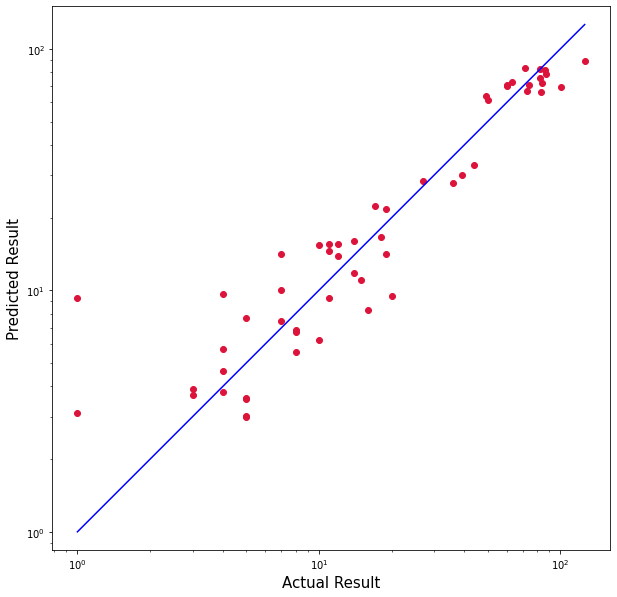

In [12]:
#final result for lasso regression
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Result', fontsize=15)
plt.ylabel('Predicted Result', fontsize=15)
plt.axis('equal')
plt.show()

# Polynomial Regression

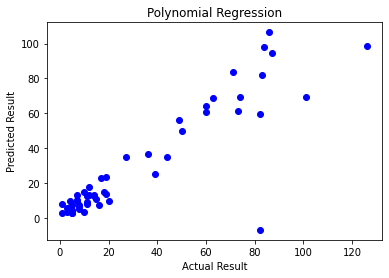

Mean Squared Error
Train:  26.641637534814418
Test:  222.32261348106317


In [13]:
#Polynomial Regression

#Create an instance of the class with degree of 2 and no include_bias
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly_transform.fit_transform(x_train)
x_poly_test = poly_transform.transform(x_test)

#Create an instance of the class for LR and fit the train data
LR = LinearRegression()
LR.fit(x_poly_train, y_train)

# Use LR to visualise 
poly_y_train_pred = LR.predict(x_poly_train)
poly_y_train_mse = mean_squared_error(y_train, poly_y_train_pred)
poly_y_test_pred = LR.predict(x_poly_test)
poly_y_test_mse = mean_squared_error(y_test, poly_y_test_pred)

# Plotting graph
plt.scatter(y_test,poly_y_test_pred, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.show()

print("Mean Squared Error")
print("Train: ", poly_y_train_mse)
print("Test: ", poly_y_test_mse)

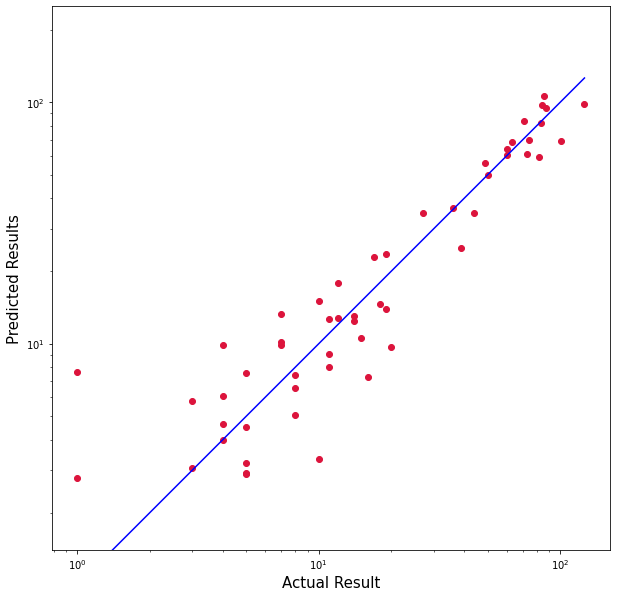

In [14]:
#final result for polynomial regression
plt.figure(figsize=(10,10))
plt.scatter(y_test, poly_y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(poly_y_test_pred), max(y_test))
p2 = min(min(poly_y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Result', fontsize=15)
plt.ylabel('Predicted Results', fontsize=15)
plt.axis('equal')
plt.show()